In [3]:
import pandas as pd
import numpy as np
import os.path as op
import pickle as pkl
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from glob import glob

# Load Individual Results

## Classifiers

In [4]:
# load data
data_dir = '/scratch/users/ethanroy/eeg_groupitizing_data/results/classification_results'

files = glob(op.join(data_dir,'ENI_2*.pkl'))

subs_dict = {}

for file in files:
    
    subjectID = file.split('/')[-1][0:7]
    
    print(f"Loading {subjectID}")
    # Load data for pilot 1
    with open(file, 'rb') as f:
        ind_dict = pkl.load(f)
        subs_dict[subjectID] = ind_dict
    

Loading ENI_218


/home/groups/jyeatman/software/ethanroy/envs/mne/lib/python3.12/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


Loading ENI_203
Loading ENI_208
Loading ENI_201
Loading ENI_211
Loading ENI_222
Loading ENI_206
Loading ENI_209
Loading ENI_200
Loading ENI_213
Loading ENI_212
Loading ENI_217
Loading ENI_219
Loading ENI_205
Loading ENI_207
Loading ENI_210
Loading ENI_202


## Permutation Tests

In [66]:
test_files = glob(op.join(res_dir, '*_labels_numerosity_combined_perm_results.pkl'))

[i.split('/')[-1] for i in test_files]



['ENI_209_labels_numerosity_combined_perm_results.pkl',
 'ENI_201_labels_numerosity_combined_perm_results.pkl',
 'ENI_219_labels_numerosity_combined_perm_results.pkl',
 'ENI_210_labels_numerosity_combined_perm_results.pkl',
 'ENI_211_labels_numerosity_combined_perm_results.pkl',
 'ENI_203_labels_numerosity_combined_perm_results.pkl',
 'ENI_205_labels_numerosity_combined_perm_results.pkl',
 'ENI_202_labels_numerosity_combined_perm_results.pkl',
 'ENI_213_labels_numerosity_combined_perm_results.pkl',
 'ENI_218_labels_numerosity_combined_perm_results.pkl',
 'ENI_217_labels_numerosity_combined_perm_results.pkl',
 'ENI_207_labels_numerosity_combined_perm_results.pkl',
 'ENI_212_labels_numerosity_combined_perm_results.pkl',
 'ENI_222_labels_numerosity_combined_perm_results.pkl',
 'ENI_200_labels_numerosity_combined_perm_results.pkl',
 'ENI_208_labels_numerosity_combined_perm_results.pkl',
 'ENI_206_labels_numerosity_combined_perm_results.pkl']

In [5]:
res_dir = '/scratch/users/ethanroy/eeg_groupitizing_data/results/perm_results/'

files = glob(op.join(res_dir, '*_classification_perm_results.pkl'))

In [6]:
perm_results = {}

for file in files:
    
    sub = file.split('/')[-1][0:7]
    
    with open(file, 'rb') as f:
        ind_dict = pkl.load(f)
        perm_results = perm_results|ind_dict
        
    

# Overall Accuracy

In [19]:
overall_acc_df = pd.DataFrame()
overall_acc_df_wide = pd.DataFrame()


for sub in perm_results.keys():
    
    sub_row = {'Participant':sub,
               'score_solution': perm_results[sub]['overall_accuracy_solution']['score'],
               'score_equals': perm_results[sub]['overall_accuracy_eq']['score']}

    # Concatenate the original DataFrame and the new row DataFrame
    overall_acc_df_wide = pd.concat([overall_acc_df_wide, pd.DataFrame([sub_row])], ignore_index=True)

    
    sub_row = {'Participant':sub,
               'epoch': 'solution',
               'score': perm_results[sub]['overall_accuracy_solution']['score'],
               'pval': perm_results[sub]['overall_accuracy_solution']['pvals']}

    # Concatenate the original DataFrame and the new row DataFrame
    overall_acc_df = pd.concat([overall_acc_df, pd.DataFrame([sub_row])], ignore_index=True)

    sub_row = {'Participant':sub,
               'epoch': 'equals',
               'score': perm_results[sub]['overall_accuracy_eq']['score'],
               'pval': perm_results[sub]['overall_accuracy_eq']['pvals']}

    # Concatenate the original DataFrame and the new row DataFrame
    overall_acc_df = pd.concat([overall_acc_df, pd.DataFrame([sub_row])], ignore_index=True)



In [20]:
overall_acc_df['sig'] = overall_acc_df['pval']<0.05

overall_acc_df.groupby(['sig','epoch']).count()

Participant  score  pval
sig   epoch                             
False equals             17     17    17
      solution           12     12    12
True  solution            5      5     5

In [31]:
perm_results[sub].keys()

dict_keys(['overall_accuracy_solution', 'train_dots_accuracy_solution', 'train_dots_generalizing_solution', 'train_digits_accuracy_solution', 'train_digits_generalizing_solution', 'overall_accuracy_eq', 'train_dots_accuracy_eq', 'train_dots_generalizing_eq', 'train_digits_accuracy_eq', 'train_digits_generalizing_eq'])

In [73]:
# collect each 1000-item array into a single 2-D array
all_scores = np.stack([d['overall_accuracy_solution']['permutation_scores'] for d in perm_results.values()])

# mean across all participants and all permutations
mean_all = all_scores.mean(axis=0)
mean_acc = overall_acc_df_wide['score_solution'].mean()

print(f'Mean Accuracy Solution Epoch: {mean_acc}')
print(f'p-value: {((mean_acc < mean_all).sum())/mean_all.shape[0]}')


Mean Accuracy Solution Epoch: 0.5496398944193063
p-value: 0.0


In [74]:
# collect each 1000-item array into a single 2-D array
all_scores = np.stack([d['overall_accuracy_eq']['permutation_scores'] for d in perm_results.values()])

# mean across all participants and all permutations
mean_all = all_scores.mean(axis=0)

# mean across all participants and all permutations
mean_all = all_scores.mean(axis=0)
mean_acc = overall_acc_df_wide['score_equals'].mean()

print(f'Mean Accuracy Equals Epoch: {mean_acc}')
print(f'p-value: {((mean_acc < mean_all).sum())/mean_all.shape[0]}')


Mean Accuracy Equals Epoch: 0.49009049773755653
p-value: 0.817


In [7]:
# Perform the paired t-test
t_statistic, p_value = stats.ttest_rel(overall_acc_df_wide['score_solution'],
                                       overall_acc_df_wide['score_equals'])

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: 3.7272292246781684
P-value: 0.0018338342654817604


In [8]:
stats.ttest_1samp(overall_acc_df[(overall_acc_df['epoch']=='solution')]['score'],0.5,alternative='greater')

TtestResult(statistic=np.float64(3.0886519605383755), pvalue=np.float64(0.003522670857402142), df=np.int64(16))

In [9]:
stats.ttest_1samp(overall_acc_df[(overall_acc_df['epoch']=='equals')]['score'],0.5,alternative='greater')

TtestResult(statistic=np.float64(-0.7996510292378555), pvalue=np.float64(0.7821875865804921), df=np.int64(16))

<Axes: xlabel='epoch', ylabel='score'>

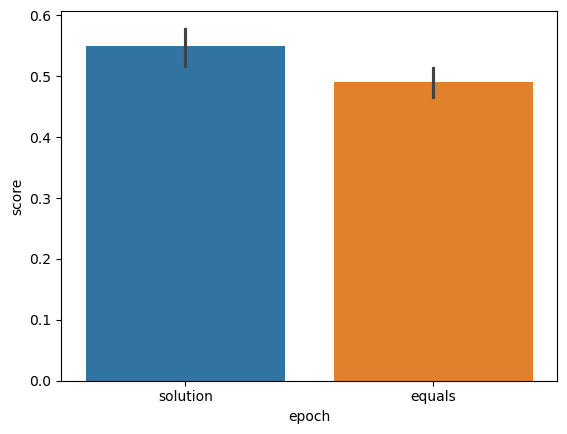

In [11]:
sns.barplot(overall_acc_df, x='epoch',y='score', hue='epoch')

# Within-Format Accuracy

In [35]:
within_df = pd.DataFrame()
within_df_wide = pd.DataFrame()

forms = ['dots','digits']
epochs = ['solution','eq']

for sub in perm_results.keys():
    
    sub_row = {'Participant':sub,
               'score_solution_dots': perm_results[sub]['train_dots_accuracy_solution']['score'],
               'score_equals_dots': perm_results[sub]['train_dots_accuracy_eq']['score'],
               'score_solution_digits': perm_results[sub]['train_digits_accuracy_solution']['score'],
               'score_equals_digits': perm_results[sub]['train_digits_accuracy_eq']['score'],}

    # Concatenate the original DataFrame and the new row DataFrame
    within_df_wide = pd.concat([within_df_wide, pd.DataFrame([sub_row])], ignore_index=True)

    for form in forms:
        for epoch in epochs:
            
            sub_row = {'Participant':sub,
                       'epoch': epoch,
                       'type': form,
                       'score': perm_results[sub][f'train_{form}_accuracy_{epoch}']['score'],
                       'pval': perm_results[sub][f'train_{form}_accuracy_{epoch}']['pvals']}

            # Concatenate the original DataFrame and the new row DataFrame
            within_df = pd.concat([within_df, pd.DataFrame([sub_row])], ignore_index=True)



In [25]:
within_df.groupby(['epoch','type'])[['score','pval']].mean()

score      pval
epoch    type                      
eq       digits  0.498816  0.534701
         dots    0.503522  0.521890
solution digits  0.540008  0.399777
         dots    0.517089  0.468649

In [26]:
within_df['sig'] = within_df['pval']<0.05

within_df.groupby(['sig','epoch']).count()

Participant  type  score  pval
sig   epoch                                   
False eq                 32    32     32    32
      solution           31    31     31    31
True  eq                  2     2      2     2
      solution            3     3      3     3

In [31]:
perm_results[sub].keys()

dict_keys(['overall_accuracy_solution', 'train_dots_accuracy_solution', 'train_dots_generalizing_solution', 'train_digits_accuracy_solution', 'train_digits_generalizing_solution', 'overall_accuracy_eq', 'train_dots_accuracy_eq', 'train_dots_generalizing_eq', 'train_digits_accuracy_eq', 'train_digits_generalizing_eq'])

In [76]:
# collect each 1000-item array into a single 2-D array
all_scores = np.stack([d['train_dots_accuracy_solution']['permutation_scores'] for d in perm_results.values()])

# mean across all participants and all permutations
mean_all = all_scores.mean(axis=0)
mean_acc = within_df[(within_df['epoch']=='solution')&(within_df['type']=='dots')]['score'].mean()


print(f'Mean Accuracy Solution Epoch: {mean_acc}')
print(f'p-value: {((mean_acc < mean_all).sum())/mean_all.shape[0]}')




Mean Accuracy Solution Epoch: 0.5170889894419306
p-value: 0.167


np.float64(0.167)

In [79]:
# collect each 1000-item array into a single 2-D array
all_scores = np.stack([d['train_dots_accuracy_eq']['permutation_scores'] for d in perm_results.values()])

# mean across all participants and all permutations
mean_all = all_scores.mean(axis=0)


mean_acc = within_df[(within_df['epoch']=='eq')&(within_df['type']=='dots')]['score'].mean()


print(f'Mean Accuracy Equals Epoch: {mean_acc}')
print(f'p-value: {((mean_acc < mean_all).sum())/mean_all.shape[0]}')



Mean Accuracy Equals Epoch: 0.5035218702865761
p-value: 0.412


In [82]:
# collect each 1000-item array into a single 2-D array
all_scores = np.stack([d['train_digits_accuracy_solution']['permutation_scores'] for d in perm_results.values()])

# mean across all participants and all permutations
mean_all = all_scores.mean(axis=0)

mean_acc = within_df[(within_df['epoch']=='solution')&(within_df['type']=='digits')]['score'].mean()
pval = ((mean_acc < mean_all).sum())/mean_all.shape[0]

print(f'Mean Accuracy Solution Epoch: {mean_acc}, p = {pval}')




Mean Accuracy Solution Epoch: 0.5400075414781297, p = 0.007


In [80]:
# collect each 1000-item array into a single 2-D array
all_scores = np.stack([d['train_digits_accuracy_eq']['permutation_scores'] for d in perm_results.values()])

# mean across all participants and all permutations
mean_all = all_scores.mean(axis=0)

mean_acc = within_df[(within_df['epoch']=='eq')&(within_df['type']=='digits')]['score'].mean()


print(f'Mean Accuracy Equals Epoch: {mean_acc}')
print(f'p-value: {((mean_acc < mean_all).sum())/mean_all.shape[0]}')



Mean Accuracy Equals Epoch: 0.49881598793363496
p-value: 0.532


In [30]:
stats.ttest_1samp(within_df[(within_df['epoch']=='solution')]['score'],0.5,alternative='greater')

TtestResult(statistic=np.float64(2.356388939365372), pvalue=np.float64(0.012271486331579115), df=np.int64(33))

In [31]:
stats.ttest_1samp(within_df[(within_df['epoch']=='eq')]['score'],0.5,alternative='greater')

TtestResult(statistic=np.float64(0.08956707163707033), pvalue=np.float64(0.4645863296003422), df=np.int64(33))

<Axes: xlabel='type', ylabel='score'>

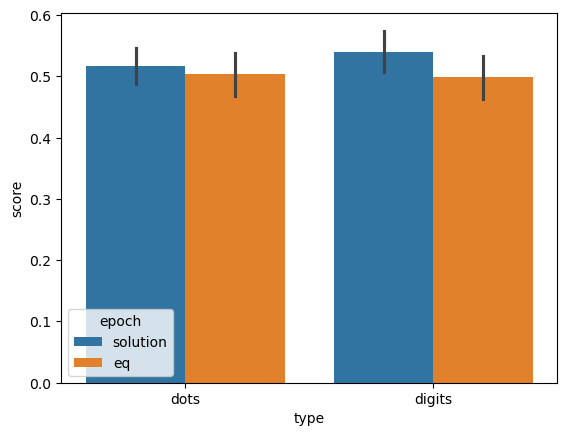

In [27]:
sns.barplot(within_df, x='type',y='score', hue='epoch')

# Cross-Format Generalzing

In [51]:
perm_results[sub].keys()

dict_keys(['overall_accuracy_solution', 'train_dots_accuracy_solution', 'train_dots_generalizing_solution', 'train_digits_accuracy_solution', 'train_digits_generalizing_solution', 'overall_accuracy_eq', 'train_dots_accuracy_eq', 'train_dots_generalizing_eq', 'train_digits_accuracy_eq', 'train_digits_generalizing_eq'])

In [52]:
gen_df = pd.DataFrame()
gen_df_wide = pd.DataFrame()

forms = ['dots','digits']
epochs = ['solution','eq']

for sub in perm_results.keys():
    
    sub_row = {'Participant':sub,
               'score_solution_dots': perm_results[sub]['train_dots_generalizing_solution']['score_gen'],
               'score_equals_dots': perm_results[sub]['train_dots_generalizing_eq']['score_gen'],
               'score_solution_digits': perm_results[sub]['train_digits_generalizing_solution']['score_gen'],
               'score_equals_digits': perm_results[sub]['train_digits_generalizing_eq']['score_gen'],}

    # Concatenate the original DataFrame and the new row DataFrame
    gen_df_wide = pd.concat([gen_df_wide, pd.DataFrame([sub_row])], ignore_index=True)

    for form in forms:
        for epoch in epochs:
            
            sub_row = {'Participant':sub,
                       'epoch': epoch,
                       'type': form,
                       'score': perm_results[sub][f'train_{form}_generalizing_{epoch}']['score_gen'],
                       'pval': perm_results[sub][f'train_{form}_generalizing_{epoch}']['score_gen']}

            # Concatenate the original DataFrame and the new row DataFrame
            gen_df = pd.concat([gen_df, pd.DataFrame([sub_row])], ignore_index=True)



In [36]:
gen_df.groupby(['epoch','type'])[['score','pval']].mean()

score      pval
epoch    type                      
eq       digits  0.495603  0.495603
         dots    0.483578  0.483578
solution digits  0.555524  0.555524
         dots    0.542564  0.542564

In [37]:
gen_df['sig'] = gen_df['pval']<0.05

gen_df.groupby(['sig','epoch']).count()

Participant  type  score  pval
sig   epoch                                   
False eq                 34    34     34    34
      solution           34    34     34    34

In [87]:
# collect each 1000-item array into a single 2-D array
all_scores = np.stack([d['train_dots_generalizing_solution']['permutation_scores_gen'] for d in perm_results.values()])

# mean across all participants and all permutations
mean_all = all_scores.mean(axis=0)
mean_acc = within_df[(gen_df['epoch']=='solution')&(within_df['type']=='dots')]['score'].mean()

sol_p_val = (( mean_acc< mean_all).sum())/mean_all.shape[0]

print(f'Dots Generalizing to Digits Solution Epoch: {mean_acc:.4f}, p = {sol_p_val}')

# collect each 1000-item array into a single 2-D array
all_scores = np.stack([d['train_dots_generalizing_eq']['permutation_scores_gen'] for d in perm_results.values()])

# mean across all participants and all permutations
mean_all = all_scores.mean(axis=0)
mean_acc = within_df[(gen_df['epoch']=='eq')&(within_df['type']=='dots')]['score'].mean()

eq_p_val = (( mean_acc< mean_all).sum())/mean_all.shape[0]

print(f'Dots Generalizing to Digits Equals Epoch: {mean_acc:.4f}, p = {eq_p_val}')



Dots Generalizing to Digits Solution Epoch: 0.5171, p = 0.11
Dots Generalizing to Digits Equals Epoch: 0.5035, p = 0.403


In [89]:
# collect each 1000-item array into a single 2-D array
all_scores = np.stack([d['train_digits_generalizing_solution']['permutation_scores_gen'] for d in perm_results.values()])

# mean across all participants and all permutations
mean_all = all_scores.mean(axis=0)
mean_acc = within_df[(gen_df['epoch']=='solution')&(within_df['type']=='digits')]['score'].mean()

sol_p_val = (( mean_acc< mean_all).sum())/mean_all.shape[0]

print(f'Digits Generalizing to Dots Solution Epoch: {mean_acc:.4f}, p = {sol_p_val}')

# collect each 1000-item array into a single 2-D array
all_scores = np.stack([d['train_digits_generalizing_eq']['permutation_scores_gen'] for d in perm_results.values()])

# mean across all participants and all permutations
mean_all = all_scores.mean(axis=0)
mean_acc = within_df[(gen_df['epoch']=='eq')&(within_df['type']=='digits')]['score'].mean()

eq_p_val = (( mean_acc< mean_all).sum())/mean_all.shape[0]

print(f'Digits Generalizing to Dots Equals Epoch: {mean_acc:.4f}, p = {eq_p_val}')



Digits Generalizing to Dots Solution Epoch: 0.5400, p = 0.004
Digits Generalizing to Dots Equals Epoch: 0.4988, p = 0.536


In [60]:
stats.ttest_1samp(gen_df[(gen_df['epoch']=='solution')]['score'],0.5,alternative='greater')

TtestResult(statistic=np.float64(4.115660138681721), pvalue=np.float64(0.00012100529236855092), df=np.int64(33))

In [61]:
stats.ttest_1samp(gen_df[(gen_df['epoch']=='eq')]['score'],0.5,alternative='greater')

TtestResult(statistic=np.float64(-1.067844303854178), pvalue=np.float64(0.8533297480148063), df=np.int64(33))

<Axes: xlabel='type', ylabel='score'>

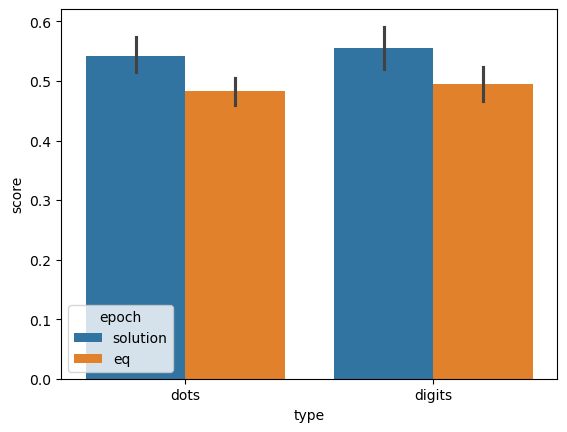

In [62]:
sns.barplot(gen_df, x='type',y='score', hue='epoch')